In [1]:
import pandas as pd
from io import StringIO

In [2]:
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [3]:
df = pd.read_csv(StringIO(csv_data))

In [4]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [6]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [7]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [9]:
# drop row fewer than 4 values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [12]:
from sklearn.impute import SimpleImputer
import numpy as np

In [15]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [16]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


# Categorical

In [17]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2'],
])

In [18]:
df.columns = ['color', 'size', 'price', 'classlabel']

In [19]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [20]:
size_mapping = {
    'XL' : 3,
    'L' : 2,
    'M' : 1
}

In [21]:
df['size'] = df['size'].map(size_mapping)

In [22]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [23]:
inv_size_mapping = {v:k for k,v in size_mapping.items()}

In [24]:
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

# Encoding class label

In [25]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}

In [26]:
class_mapping

{'class1': 0, 'class2': 1}

In [27]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [28]:
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [29]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}

In [32]:
df['classlabel'] = df['classlabel'].map(inv_class_mapping)

In [31]:
from sklearn.preprocessing import LabelEncoder

In [33]:
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [34]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

# Nominal feature

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
X = df[['color', 'size', 'price']].values

In [37]:
color_ohe = OneHotEncoder()

In [38]:
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [39]:
from sklearn.compose import ColumnTransformer

In [40]:
X = df[['color', 'size', 'price']].values

In [44]:
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [43]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


# Encoding ordinal feature (alternative)

In [46]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                 ['red', 'L', 13.5, 'class1'],
                 ['blue', 'XL', 15.3, 'class2']])

In [47]:
df.columns = ['color', 'size', 'price', 'classlabel']

In [48]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [51]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

In [52]:
df

,color,size,price,classlabel,x > M,x > L
0,green,M,10.1,class2,0,0
1,red,L,13.5,class1,1,0
2,blue,XL,15.3,class2,1,1


# Train test split

In [55]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [57]:
df_wine.columns = [
    'Class label',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of Ash',
    'Magnesium',
    'Total phenols',
    'Flavaniods',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'
]

In [58]:
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [60]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavaniods,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Normalization

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
mms = MinMaxScaler()

In [67]:
X_train_norm = mms.fit_transform(X_train)

In [68]:
X_test_norm = mms.transform(X_test)

In [69]:
X_test_norm

array([[ 0.69005848,  0.22924901,  0.64052288,  0.30645161,  0.55555556,
         0.69655172,  0.51687764,  0.52      ,  0.39873418,  0.40497336,
         0.69148936,  0.60805861,  0.78245364],
       [ 0.22222222,  0.14031621,  0.54248366,  0.40860215,  0.41975309,
         0.3137931 ,  0.29746835,  0.64      ,  0.19303797,  0.10746004,
         1.03191489,  0.35164835,  0.05492154],
       [ 0.87134503,  0.22332016,  0.49019608,  0.17204301,  0.32098765,
         0.52413793,  0.45991561,  0.34      ,  0.49367089,  0.31172291,
         0.57446809,  0.84615385,  0.72182596],
       [ 0.52339181,  0.2055336 ,  0.2875817 , -0.01075269,  0.37037037,
         0.57586207,  0.51054852,  0.26      ,  0.2721519 ,  0.23445826,
         0.60638298,  0.78021978,  0.55064194],
       [ 0.28070175,  0.06521739,  0.26143791,  0.38172043,  0.22222222,
         0.87586207,  0.71940928,  0.22      ,  0.48417722,  0.24511545,
         0.59574468,  0.54945055,  0.2724679 ],
       [ 0.30409357,  0.452569

# Standardization

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
stdsc = StandardScaler()

In [72]:
X_train_std = stdsc.fit_transform(X_train)

In [73]:
X_test_std = stdsc.transform(X_test)

# L1/ L2 regularization

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
LogisticRegression(penalty='l1',
                  solver='liblinear',
                  multi_class='ovr')

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

# Sequential Backwards Feature Selection

In [77]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [93]:
class SBS():
    def __init__(self, estimator, k_features,
                scoring=accuracy_score,
                test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indicies_ = tuple(range(dim))
        self.subsets_ = [self.indicies_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indicies_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indicies_, r = dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, self.indicies_)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indicies_ = subsets[best]
            self.subsets_.append(self.indicies_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indicies):
        self.estimator.fit(X_train[:, indicies], y_train)
        y_pred = self.estimator.predict(X_test[:, indicies])
        score = self.scoring(y_test, y_pred)
        return score

In [82]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier(n_neighbors=5)

In [94]:
sbs = SBS(knn, k_features=1)

In [95]:
sbs.fit(X_train_std, y_train)

In [96]:
k_feat = [len(k) for k in sbs.subsets_]

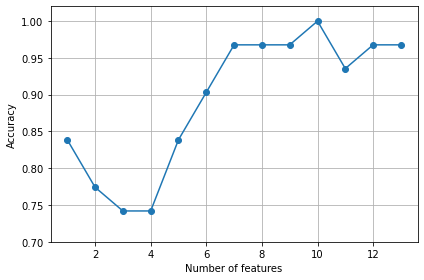

In [97]:
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

# Feature importance with Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
feat_labels = df_wine.columns[1:]

In [100]:
forest = RandomForestClassifier(n_estimators=500, random_state=1)

In [102]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [103]:
importances = forest.feature_importances_

In [104]:
indices = np.argsort(importances)[::-1]

In [107]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"% (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavaniods                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of Ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


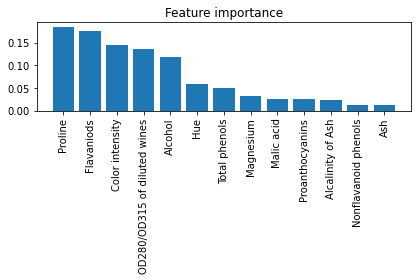

In [109]:
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

In [110]:
from sklearn.feature_selection import SelectFromModel

In [112]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)

In [113]:
X_selected = sfm.transform(X_train)

In [115]:
print('Number of features that meet this threshold',
    'criterion: ', X_selected.shape[1])

Number of features that meet this threshold criterion:  5


In [116]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % ( f + 1, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavaniods                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
